Final Product: "Predicting On-Time vs Late Deliveries"

Research question: "Can the late deliveries be accurately predicted based on shipment characteristics?"

The final products is a combination of both eda.py and train.py, created beforehand. 

Target column: Reached.on.Time_Y.N
1 = Reached on Time
0 = Late

In [27]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the dataset (pandas read CSV)
df = pd.read_csv("/Users/karinabalandina/Can-the-late-deliveries-be-accurately-predicted-based-on-shipment-characteristics-/data/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


1. EXPLORATORY DATA ANALYSIS with a help of Seaborn library.

The goal is to understand the dataset and look for patterns related to late/on-time deliveries with a help of visual plots.

In [29]:
# Basic infobout the dataset
print("BASIC DATASET INFO")
print("Number of rows and columns:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

BASIC DATASET INFO
Number of rows and columns: (10999, 12)

Column names:
['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [30]:
# Check missing values
print("\n MISSING VALUES PER COLUMN")
print(df.isna().sum())


 MISSING VALUES PER COLUMN
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [31]:
# On-time vs late deliveries
# Reached.on.Time_Y.N: 1 = on time; 0 = late
print("\n ON-TIME VS LATE DELIVERIES")
print(df["Reached.on.Time_Y.N"].value_counts())


 ON-TIME VS LATE DELIVERIES
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


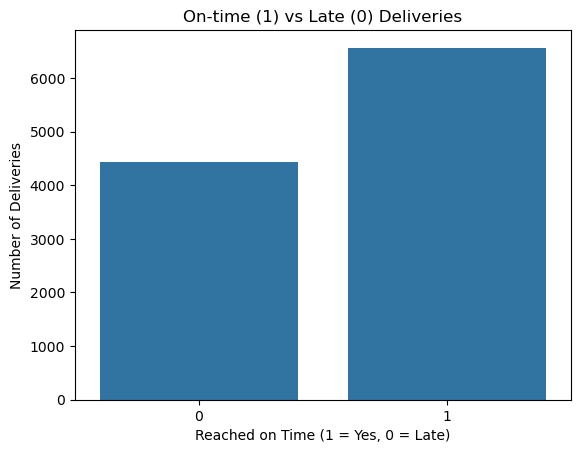

In [32]:
# Plot: On-time vs late deliveries
sns.countplot(data=df, x="Reached.on.Time_Y.N")
plt.title("On-time (1) vs Late (0) Deliveries")
plt.xlabel("Reached on Time (1 = Yes, 0 = Late)")
plt.ylabel("Number of Deliveries")
plt.show()

Plot 1: On-time deliveries being more frequent, comparing to late deliveries. However, a substantial number of late deliveries is still present, making it suitable for predicting delivery delays.

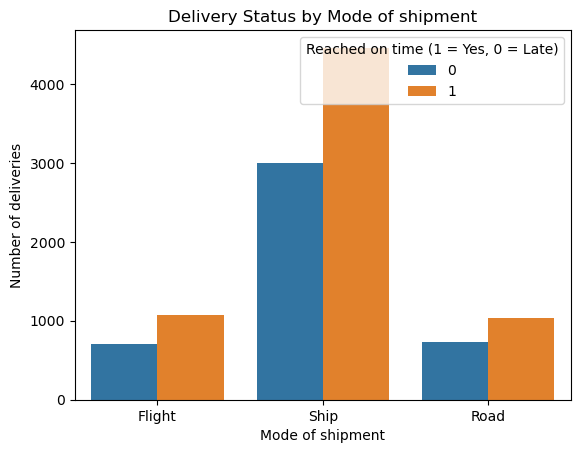

In [33]:
# Plot: Delivery status by Mode of shipment
sns.countplot(
    data=df,
    x="Mode_of_Shipment",
    hue="Reached.on.Time_Y.N"
)
plt.title("Delivery Status by Mode of shipment")
plt.xlabel("Mode of shipment")
plt.ylabel("Number of deliveries")
plt.legend(title="Reached on time (1 = Yes, 0 = Late)")
plt.show()


Plot 2: The delivery outcome varies across different modes of shipment. Some shipment methods show a higher proportion of late deliveries, suggesting that the mode of shipment may influence whether a delivery arrives on time. Ship deliveries show a relatively higher proportion of late deliveries compared to flight and road transport.

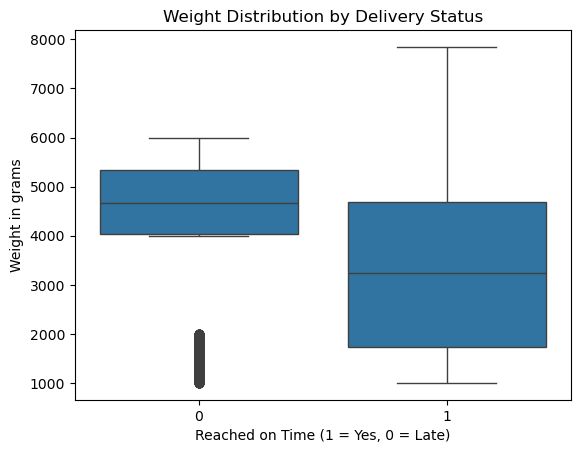

In [34]:
# Plot: Weight distribution by delivery status
sns.boxplot(
    data=df,
    x="Reached.on.Time_Y.N",
    y="Weight_in_gms"
)
plt.title("Weight Distribution by Delivery Status")
plt.xlabel("Reached on Time (1 = Yes, 0 = Late)")
plt.ylabel("Weight in grams")
plt.show()

Plot 3: The box plot compares the distribution of shipment weights for on-time and late deliveries. Each box represents the range where most shipment weights are located, while the line inside the box shows the typical (median) weight. The plot shows that late deliveries generally have higher shipment weights compared to on-time deliveries. This indicates that heavier shipments are more likely to experience delivery delays. Overall, the visualization suggests that shipment weight is an important factor influencing whether a delivery arrives on time.

2. MODELING (LOGISTIC REGRESSION) + PRINTING STRONGEST FEATURES with a help of Scikit-learn

Logistic Regression model is trained to predict "Reached.on.Time_Y.N" using shipment characteristics.

Categorical features are OneHot encoded and numeric features are kept as they are.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
TARGET_COL = "Reached.on.Time_Y.N"

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% training, 20% testing
    random_state=42, # same split each run
    stratify=y # keep similar 0/1 proportions in train/test
)

In [37]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

model = LogisticRegression(max_iter=5000, solver="liblinear")

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6582

Confusion matrix:
 [[563 324]
 [428 885]]

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.67      0.66      0.66      2200



The logistic regression model achieved an accuracy of 65.8%, meaning that 1,448 out of 2,200 deliveries were classified correctly.

According to the confusion matrix, the model correctly identified 885 on-time deliveries and 563 late deliveries, while misclassifying 324 late deliveries as on-time and 428 on-time deliveries as late. 

The classification report shows that the precision for on-time deliveries (class 1) is 0.73, compared to 0.57 for late deliveries (class 0), indicating that predictions of on-time shipments are more reliable. The recall is 0.67 for on-time deliveries and 0.63 for late deliveries, meaning the model detects on-time shipments slightly better than late ones. 



In [39]:
preprocessor = clf.named_steps["preprocessor"]
feature_names = preprocessor.get_feature_names_out()

coefs = clf.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefs})
coef_df = coef_df.sort_values(by="coefficient", ascending=False)

top_n = 10

print("TOP FEATURES PUSHING TOWARD ON-TIME (class 1)")
display(coef_df.head(top_n))

print("\nTOP FEATURES PUSHING TOWARD LATE (class 0)")
display(coef_df.tail(top_n).sort_values(by="coefficient"))

TOP FEATURES PUSHING TOWARD ON-TIME (class 1)


,feature,coefficient
8,cat__Product_importance_high,0.426138
12,cat__Gender_M,0.412527
11,cat__Gender_F,0.386908
5,cat__Mode_of_Shipment_Flight,0.302564
7,cat__Mode_of_Shipment_Ship,0.266839
3,cat__Warehouse_block_D,0.230287
6,cat__Mode_of_Shipment_Road,0.230032
9,cat__Product_importance_low,0.205040
10,cat__Product_importance_medium,0.168257
1,cat__Warehouse_block_B,0.167662



TOP FEATURES PUSHING TOWARD LATE (class 0)


,feature,coefficient
14,num__Customer_care_calls,-0.077095
17,num__Prior_purchases,-0.042767
16,num__Cost_of_the_Product,-0.000680
19,num__Weight_in_gms,-0.000195
13,num__ID,-0.000162
15,num__Customer_rating,0.022286
18,num__Discount_offered,0.092898
2,cat__Warehouse_block_C,0.114653
0,cat__Warehouse_block_A,0.123120
4,cat__Warehouse_block_F,0.163713


The coefficients show how each feature influences delivery timing. Positive values increase the probability of on-time delivery, while negative values increase the probability of late delivery. Larger absolute values indicate stronger influence on the prediction.

High product importance has the strongest positive effect on on-time delivery (0.426). This means important products are more likely to arrive on time. 

Deliveries to both male (0.413) and female (0.387) customers also show a higher chance of being on time. 

Shipments sent by flight (0.303) and by ship (0.267) are more often on time than other transport modes, while road transport (0.230) has a smaller positive effect. 

Warehouse location matters, especially warehouse block D (0.230) and block B (0.168). In contrast, deliveries with many customer care calls (−0.077) or many prior purchases (−0.043) are more likely to be late. 

Product cost and weight have very small effects and do not strongly influence delivery timing.

CONCLUSION:
This project studied whether shipment characteristics can be used to predict if a delivery is on time or late. 
A Logistic Regression model was trained using shipment and customer-related features. 
The model achieved an accuracy of about 66%, meaning it correctly classified around two thirds of the deliveries. 
The results show that the model predicts on-time deliveries better than late deliveries. 
Feature analysis shows that product importance, shipment mode, and warehouse location have the strongest influence on delivery performance, while customer care calls and prior purchases are more related to late deliveries. 
Overall, the results indicate that shipment characteristics can be used to predict delivery status to a moderate extent, but more advanced models or additional data could further improve prediction accuracy.